In [1]:
import pandas as pd

# Data Cleaning

### Filter down to just Boilers

In [4]:
all_complaints = pd.read_csv('data/DOB_Complaints_Received.csv')
list(all_complaints)

/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (4,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


['Complaint Number',
 'Status',
 'Date Entered',
 'House Number',
 'ZIP Code',
 'House Street',
 'BIN',
 'Community Board',
 'Special District',
 'Complaint Category',
 'Unit',
 'Disposition Date',
 'Disposition Code',
 'Inspection Date',
 'DOBRunDate']

In [24]:
complaint_categories = [56, 58, 82]
boiler_complaints = all_complaints[all_complaints['Complaint Category'].isin(complaint_categories)]

print("Number of total complaints: {}".format(len(all_complaints)))
print("Number of boiler complaints: {}".format(len(boiler_complaints)))

Number of total complaints: 2299448
Number of boiler complaints: 3811


In [36]:
positive_disposition_codes = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

boiler_complaints['Violations'] = boiler_complaints['Disposition Code'].isin(positive_disposition_codes) * 1

/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Question: Violation rate by Category?

In [37]:
category_complaints = boiler_complaints.groupby('Complaint Category').count()['BIN']
category_complaints

Complaint Category
56    1514
58    2289
82       8
Name: BIN, dtype: int64

In [38]:
category_violations = boiler_complaints.groupby('Complaint Category').sum()['Violations']
category_violations / category_complaints

Complaint Category
56    0.377807
58    0.397554
82    0.500000
dtype: float64

Ok, the violation rates are about the same so I think it makes sense to group them into one model.  Does this mean complaint category is even a good feature?

# Question: Are there duplicate complaints?

In [30]:
print(len(boiler_complaints))

3811


In [35]:
len(boiler_complaints.drop_duplicates(subset=['BIN', 'Date Entered']))

3776

# Question: If multiple people called in a complaint, is it more likely to be a violation?

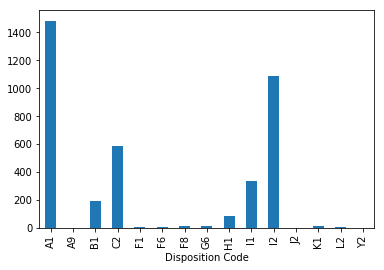

In [41]:
boiler_complaints.groupby('Disposition Code').count()['BIN'].plot('bar')

# Create Labels

In [14]:
positive_disposition_codes = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']

labels = boiler_complaints['Disposition Code'].isin(positive_disposition_codes) * 1

In [18]:
print("Percent of labels that are positive (result in violation): {}".format(sum(labels) / len(labels)))

Percent of labels that are positive (result in violation): 0.29713309284222517


# Create Features

In [32]:
X = pd.DataFrame()

### Boiler Category / Priority

In [24]:
boiler_complaints['Complaint Category'].value_counts()

58    2289
56    1514
86    1464
Name: Complaint Category, dtype: int64

In [33]:
boiler_complaints['Complaint Category'] = boiler_complaints['Complaint Category'].astype('category')
boiler_complaints['Complaint Category'] = boiler_complaints['Complaint Category'].cat.codes
X['Complaint Category'] = boiler_complaints['Complaint Category']

/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/apple/.virtualenvs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Number of previous boiler violations

In [50]:
previous_boiler_violations = boiler_complaints.groupby('BIN').count()['Status']
X['Previous Complaints'] = boiler_complaints.apply(lambda row: previous_boiler_violations[row['BIN']], axis=1 )

### Boiler make

In [56]:
boiler_inspections = pd.read_csv('data/DOB_NOW_Boiler_Safety.csv')
list(boiler_inspections)

['Tracking Number',
 'Boiler ID',
 'Report Type',
 'ApplicantFirst Name',
 'Applicant Last Name',
 'Applicant License Type',
 'Applicant License Number',
 'Owner First Name',
 'Owner Last Name',
 'Boiler Make',
 'Boiler Model',
 'Pressure Type',
 'Inspection Type',
 'Inspection Date',
 'Defects Exist',
 'LFF (45 Days)',
 'LFF (180 Days)',
 'Filing Fee',
 'Total Amount Paid',
 'Report Status',
 'Bin Number']

In [ ]:
# is every complaints within the inspections?

In [ ]:
# OK THIS WAS KINDA HARD SO I WENT RIGHT TO THE CLASSIFIER OOPS SUE ME 

# Model

,Complaint Category,Previous Complaints
2081,0,1
2082,1,1
2083,1,1
2084,1,1
2085,0,1
